# Suport Vector Machine

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [19]:
'''x1, x2 난수, 같은지 Y값 '''

np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0 , X_xor[:, 1] > 0)
tmp = np.hstack([X_xor, y_xor.reshape(-1,1)])
print(tmp[:10])
y_xor = np.where(y_xor, 1, -1)


[[ 1.62434536 -0.61175641  1.        ]
 [-0.52817175 -1.07296862  0.        ]
 [ 0.86540763 -2.3015387   1.        ]
 [ 1.74481176 -0.7612069   1.        ]
 [ 0.3190391  -0.24937038  1.        ]
 [ 1.46210794 -2.06014071  1.        ]
 [-0.3224172  -0.38405435  0.        ]
 [ 1.13376944 -1.09989127  1.        ]
 [-0.17242821 -0.87785842  0.        ]
 [ 0.04221375  0.58281521  0.        ]]


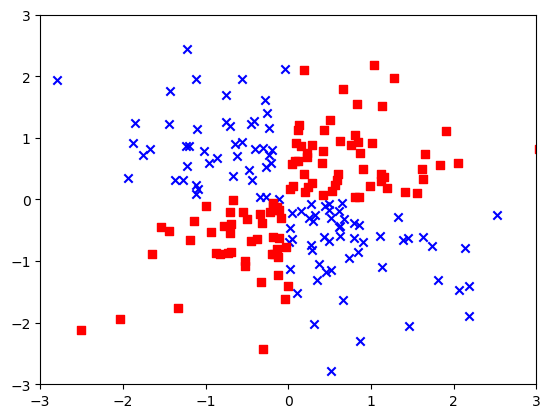

In [20]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

In [21]:
from sklearn.svm import SVC
svm = SVC( kernel='rbf', random_state=1, gamma=0.10, C=100.0 )
svm.fit( X_xor, y_xor )

SVC(C=100.0, gamma=0.1, random_state=1)

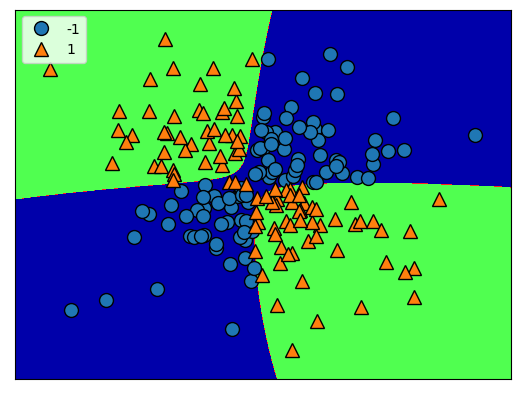

In [22]:
import mglearn
mglearn.plots.plot_2d_classification(svm, X_xor)
mglearn.discrete_scatter(X_xor[:,0], X_xor[:,1], y_xor)
plt.legend(loc='upper left')
plt.show()

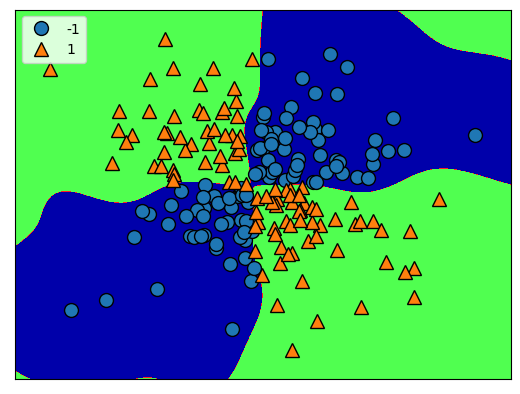

In [23]:
svm = SVC(kernel='rbf', random_state=1, gamma=2.0, C=100.0)
svm.fit(X_xor, y_xor)
mglearn.plots.plot_2d_classification(svm, X_xor)
mglearn.discrete_scatter(X_xor[:,0], X_xor[:,1], y_xor)
plt.legend(loc='upper left')
plt.show()

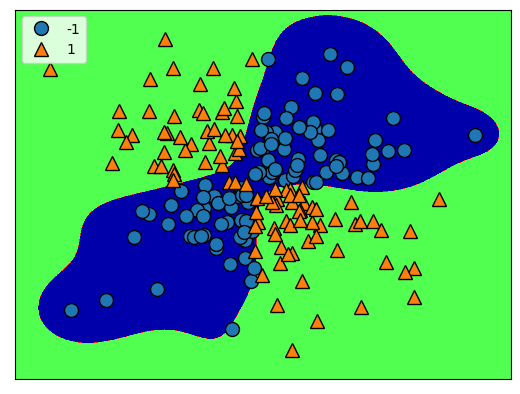

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=2.0, C=0.01)
svm.fit(X_xor, y_xor)
mglearn.plots.plot_2d_classification(svm, X_xor)
mglearn.discrete_scatter(X_xor[:,0], X_xor[:,1], y_xor)
plt.legend(loc='upper left')
plt.show()

In [25]:
import pandas as pd
resign_df = pd.read_csv("./ch1 실습/resign.csv")
resign_df.head()

,satisfaction,evaluation,project,workhour,years,accident,resign,promotion,good
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,0


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
resign_df_X = scaler.fit_transform( resign_df[['evaluation','workhour', 'satisfaction']] )
X_tr, X_ts, y_tr, y_ts = train_test_split(
    resign_df_X, resign_df['resign'], test_size=0.2, random_state=0)

In [27]:
X_tr.shape

(11999, 3)

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=5, C=0.1 )
svm.fit( X_tr, y_tr )

SVC(C=0.1, gamma=5, random_state=1)

In [29]:
svm.support_

array([    1,    12,    16, ..., 11960, 11965, 11975], dtype=int32)

In [30]:
svm.support_vectors_

array([[ 1.13282545, -1.04222751, -1.94203577],
       [ 1.42494396,  0.73985987,  0.99414419],
       [ 1.54179137,  1.4206573 ,  0.47126283],
       ...,
       [-1.37939381, -0.82196952, -0.97671633],
       [ 1.07440174,  1.32054003,  0.75281433],
       [-1.55466492, -0.94211024, -0.65494319]])

In [32]:
from mpl_toolkits.mplot3d import Axes3D

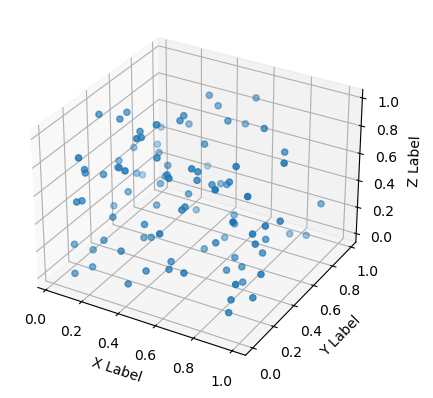

In [57]:
def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', 0, 1)]:#, ('^', 0, 1)]:
    xs = randrange(n, 0, 1)
    ys = randrange(n, 0, 1)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [49]:
X_tr_arr.shape[1]

3

TypeError: scatter() missing 1 required positional argument: 'ys'

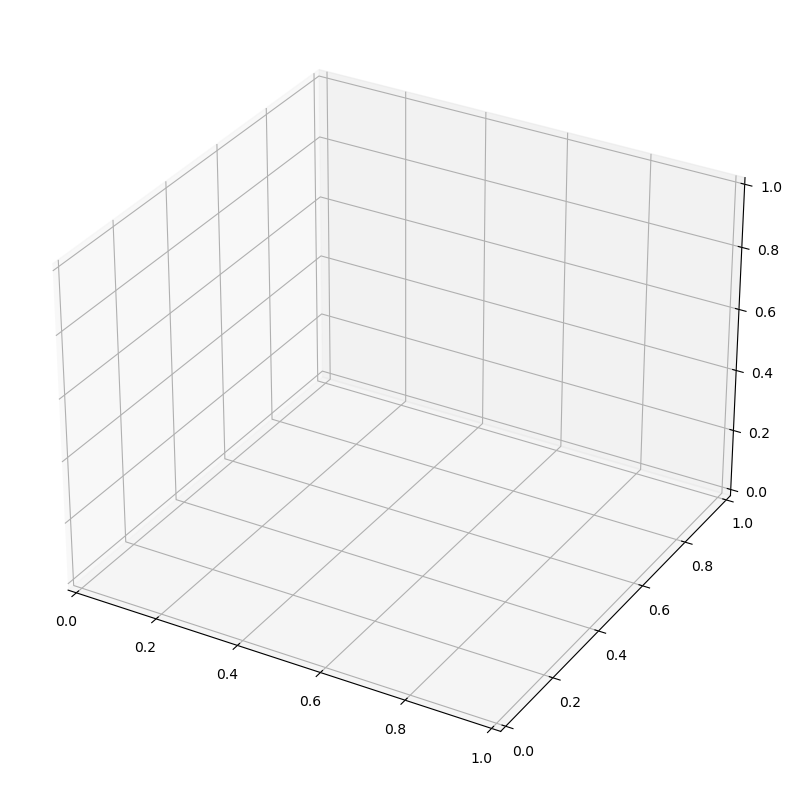

In [50]:
X_tr_arr= np.array(X_tr)
y_tr_arr= np.array(y_tr)

fig = plt.figure(figsize=(10,10), facecolor='w')
ax = fig.add_subplot(projection='3d')

#for i in range.shape[1]
xs = X_tr_arr[:,0]
#ys = X_tr_arr[:,1]
#zs = X_tr_arr[:,2]
ax.scatter(xs,ys c='b')
plt.show()

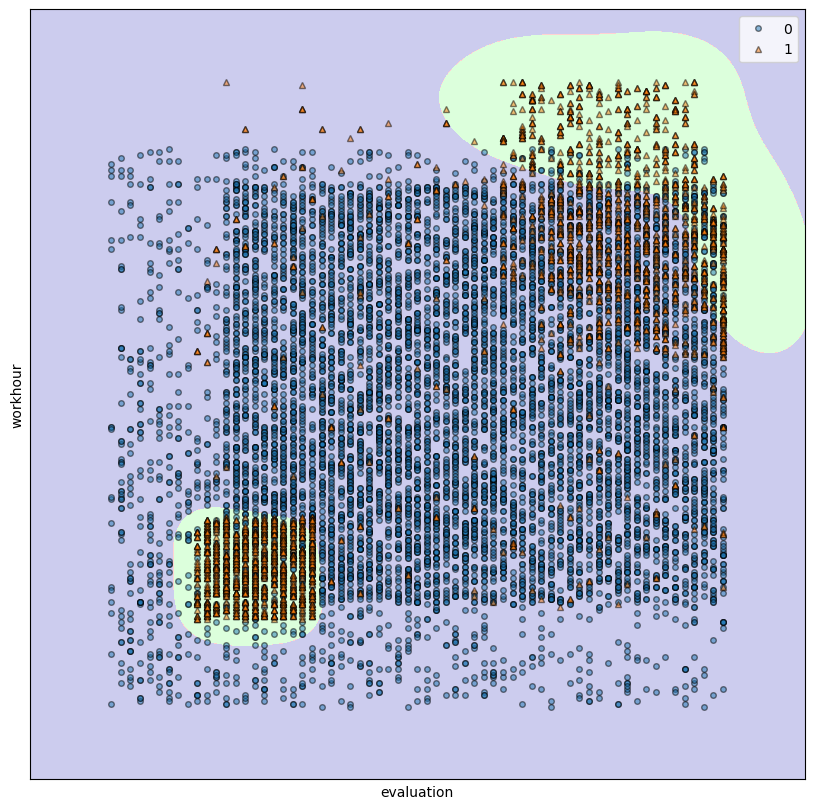

In [ ]:
X_tr_arr= np.array(X_tr)
y_tr_arr= np.array(y_tr)
plt.figure(figsize=(10, 10))
mglearn.plots.plot_2d_classification(svm, X_tr_arr, fill=True, alpha=0.2)
mglearn.discrete_scatter(X_tr_arr[:,0], X_tr_arr[:,1], y_tr_arr, alpha=0.5, s=4)
plt.legend()
plt.xlabel('evaluation')
plt.ylabel('workhour')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
y_pred = svm.predict( X_ts )

In [ ]:
confusion_matrix ( y_ts, y_pred )

array([[2139,  160],
       [ 262,  439]])

In [ ]:
accuracy_score ( y_ts, y_pred )


0.8593333333333333

In [ ]:
df = yf.download(['^GSPC', '^KS11'], '2000-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
df.rename(columns={'^GSPC':'S&P500', '^KS11':'KOSPI'}, inplace=True)

In [ ]:
df

,S&P500,KOSPI
Date,,
1999-12-31,1469.250000,NaN
2000-01-03,1455.219971,NaN
2000-01-04,1399.420044,1059.040039
2000-01-05,1402.109985,986.309998
2000-01-06,1403.449951,960.789978
...,...,...
2022-08-31,3955.000000,2472.050049
2022-09-01,3966.850098,2415.610107
2022-09-02,3924.260010,2409.409912
